# Explore here

In [3]:
# Your code here
#Cargar datos
import pandas as pd

df = pd.read_csv("../data/raw/medical_insurance_cost.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.nunique()


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

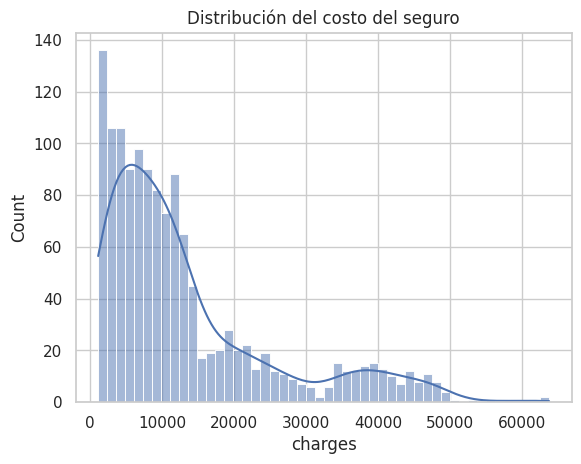

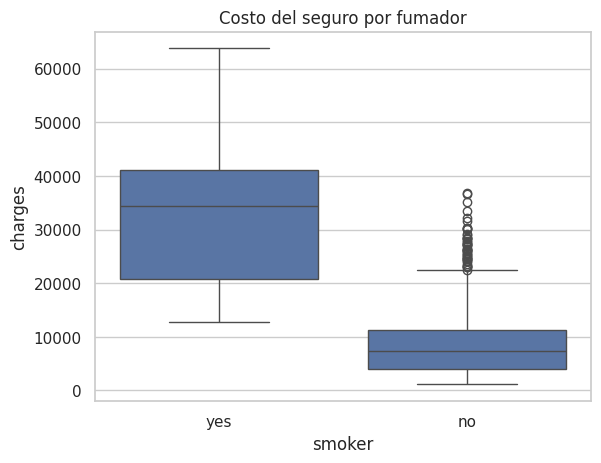

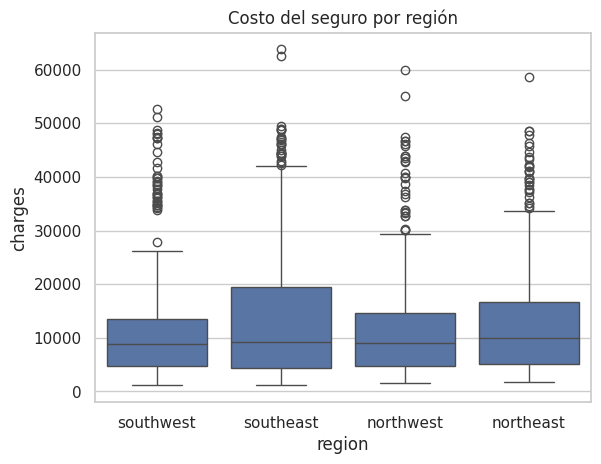

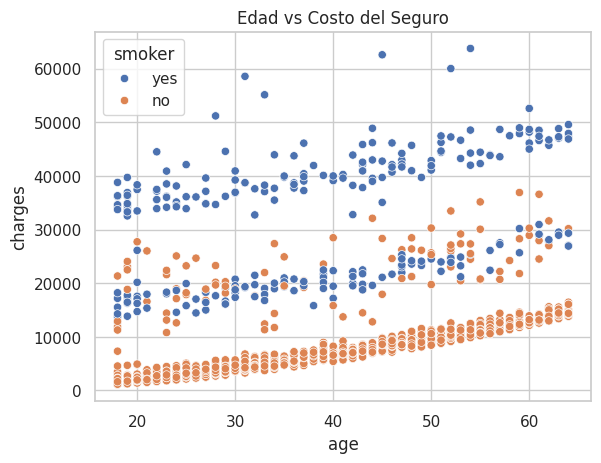

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Distribución del costo del seguro
sns.histplot(df['charges'], bins=50, kde=True)
plt.title("Distribución del costo del seguro")
plt.show()

#Comparar costo por fumador
sns.boxplot(data=df, x='smoker', y='charges')
plt.title("Costo del seguro por fumador")
plt.show()

#Comparar costo por región
sns.boxplot(data=df, x='region', y='charges')
plt.title("Costo del seguro por región")
plt.show()

#Relación edad vs. charges
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title("Edad vs Costo del Seguro")
plt.show()


In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [11]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

#Evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MSE: 33596915.85136145
RMSE: 5796.284659276273
R²: 0.7835929767120724


In [14]:
import os

os.makedirs("../data/processed", exist_ok=True)

df_encoded.to_csv("../data/processed/insurance_clean.csv", index=False)


- El modelo explica un X% de la variabilidad (ver R²).
- Las variables más importantes son `age`, `bmi`, y `smoker_yes`.
- Los fumadores tienen un costo mucho mayor.
- El modelo puede usarse como una primera aproximación, pero podría mejorarse usando regresión polinómica, regularización o boosting.
